# Statistical Thinking in Python (Part 1)
## Course Description
After all of the hard work of acquiring data and getting them into a form you can work with, you ultimately want to make clear, succinct conclusions from them. This crucial last step of a data analysis pipeline hinges on the principles of statistical inference. In this course, you will start building the foundation you need to think statistically, speak the language of your data, and understand what your data is telling you. The foundations of statistical thinking took decades to build, but can be grasped much faster today with the help of computers. With the power of Python-based tools, you will rapidly get up-to-speed and begin thinking statistically by the end of this course.

## 1. Graphical exploratory data analysis

Before diving into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data.

### Plotting a histogram of iris data
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array versicolor_petal_length.

In the video, Justin plotted the histograms by using the pandas library and indexing the DataFrame to extract the desired column. Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for plt.show()) to the dummy variable _. This is to prevent unnecessary output from being displayed. It is not required for your solutions to these exercises, however it is good practice to use it. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a ; after your plotting statements to achieve the same effect. Justin prefers using _. Therefore, you will see it used in the solution code.

#### Instructions

- Import matplotlib.pyplot and seaborn as their usual aliases (plt and sns).
- Use seaborn to set the plotting defaults.
- Plot a histogram of the Iris versicolor petal lengths using plt.hist() and the provided NumPy array versicolor_petal_length.
- Show the histogram using plt.show().

In [2]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn import datasets
import pandas as pd

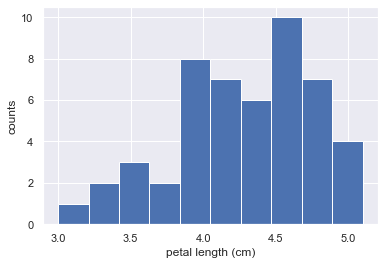

In [3]:


versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])


# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths

_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('counts')

# Show histogram
plt.show()

### Adjusting the number of bins in a histogram
The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist().

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, versicolor_petal_length, is already in your namespace.

#### Instructions

-  Import numpy as np. This gives access to the square root function, np.sqrt().
- Determine how many data points you have using len().
- Compute the number of bins using the square root rule.
- Convert the number of bins to an integer using the built in int() function.
- Generate the histogram and make sure to use the bins keyword argument.
- Hit 'Submit Answer' to plot the figure and see the fruit of your labors!


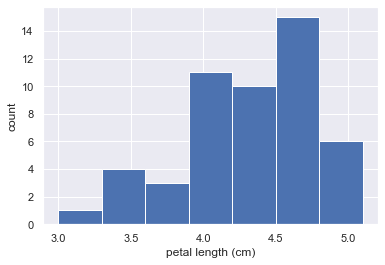

In [4]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins= n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

### Bee swarm plot
Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as df.

For your reference, the code Justin used to create the bee swarm plot in the video is provided below:

```Python
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
```


In the IPython Shell, you can use sns.swarmplot? or help(sns.swarmplot) for more details on how to make bee swarm plots using seaborn.

#### Instructions

- In the IPython Shell, inspect the DataFrame df using df.head(). This will let you identify which column names you need to pass as the x and y keyword arguments in your call to sns.swarmplot().
- Use sns.swarmplot() to make a bee swarm plot from the DataFrame containing the Fisher iris data set, df. The x-axis should contain each of the three species, and the y-axis should contain the petal lengths.
- Label the axes.
- Show your plot.

In [5]:
iris = datasets.load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df['species']= pd.Categorical.from_codes(iris.target, iris.target_names)
df = df.drop(columns='target')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


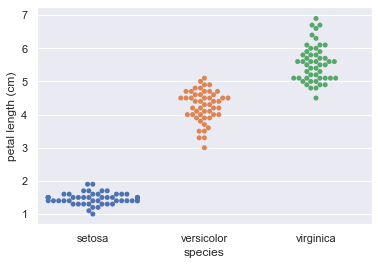

In [6]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)',data=df)


# Label the axes

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### Computing the ECDF
In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:

```Python
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
```

The function foo() above takes two arguments a and b and returns two values x and y. The function header def foo(a,b): contains the function signature foo(a,b), which consists of the function name, along with its parameters. For more on writing your own functions, see DataCamp's course Python Data Science Toolbox (Part 1) here!

#### Instructions


- Define a function with the signature ecdf(data). Within the function definition,
- Compute the number of data points, n, using the len() function.
- The x-values are the sorted data. Use the np.sort() function to perform the sorting.
- The y data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.
- The function returns the values x and y.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

### Plotting the ECDF
You will now use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them. An example of such unpacking is x, y = foo(data), for some function foo().

#### Instructions

- Use ecdf() to compute the ECDF of versicolor_petal_length. Unpack the output into x_vers and y_vers.
- Plot the ECDF as dots. Remember to include marker = '.' and linestyle = 'none' in addition to x_vers and y_vers as arguments inside plt.plot().
- Label the axes. You can label the y-axis 'ECDF'.
- Show your plot.

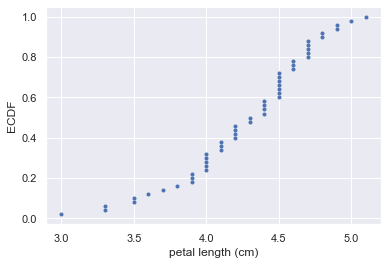

In [8]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers,y_vers,marker = '.',linestyle = 'none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF' )

# Display the plot
plt.show()

### Comparison of ECDFs
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use plt.plot() three times, once for each ECDF. Remember to include marker='.' and linestyle='none' as arguments inside plt.plot().

#### Instructions

- Compute ECDFs for each of the three species using your ecdf() function. The variables setosa_petal_length, versicolor_petal_length, and virginica_petal_length are all in your namespace. Unpack the ECDFs into x_set, y_set, x_vers, y_vers and x_virg, y_virg, respectively.
- Plot all three ECDFs on the same plot as dots. To do this, you will need three plt.plot() commands. Assign the result of each to _.
- A legend and axis labels have been added for you, so hit 'Submit Answer' to see all the ECDFs!

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [10]:
setosa_petal_length = df[df['species']=='setosa']['sepal length (cm)']
virginica_petal_length = df[df['species']=='virginica']['sepal length (cm)']
versicolor_petal_length = df[df['species']=='versicolor']['sepal length (cm)']

setosa_petal_width = df[df['species']=='setosa']['sepal width (cm)']
virginica_petal_width = df[df['species']=='virginica']['sepal width (cm)']
versicolor_petal_width = df[df['species']=='versicolor']['sepal width (cm)']



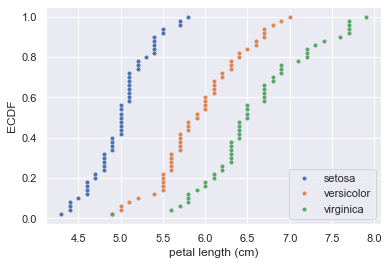

In [11]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)



# Plot all ECDFs on the same plot
_ = plt.plot(x_set,y_set,marker = '.',linestyle = 'none')
_ = plt.plot(x_vers,y_vers,marker = '.',linestyle = 'none')
_ = plt.plot(x_virg,y_virg,marker = '.',linestyle = 'none')



# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## 2.Quantitative exploratory data analysis
In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a dataset with a few numbers.

###  Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

#### Instructions

- Compute the mean petal length of Iris versicolor from Anderson's classic data set. The variable versicolor_petal_length is provided in your namespace. Assign the mean to mean_length_vers.



In [12]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 5.936 cm


### Computing percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

#### Instructions

- Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
- Use np.percentile() to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable versicolor_petal_length is in your namespace.
- Print the percentiles.

In [13]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[5.     5.6    5.9    6.3    6.8775]


### Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

#### Instructions

- Plot the percentiles as red diamonds on the ECDF. Pass the x and y co-ordinates - ptiles_vers and percentiles/100 - as positional arguments and specify the marker='D', color='red' and linestyle='none' keyword arguments. The argument for the y-axis - percentiles/100 has been specified for you.
- Display the plot.


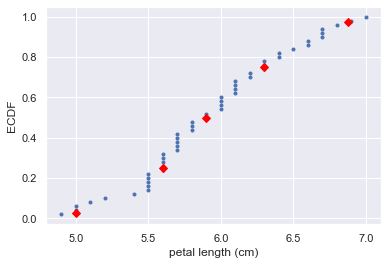

In [14]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', c='red',
         linestyle='none')

# Show the plot
plt.show()

### Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using df.head() to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:

```Python
_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)

_ = plt.xlabel('region')

_ = plt.ylabel('percent of vote for Obama')
```

In the IPython Shell, you can use sns.boxplot? or help(sns.boxplot) for more details on how to make box plots using seaborn.

#### Instructions

- The set-up is exactly the same as for the bee swarm plot; you just call sns.boxplot() with the same keyword arguments as you would sns.swarmplot(). The x-axis is 'species' and y-axis is 'petal length (cm)'.
- Don't forget to label your axes!
- Display the figure using the normal call.

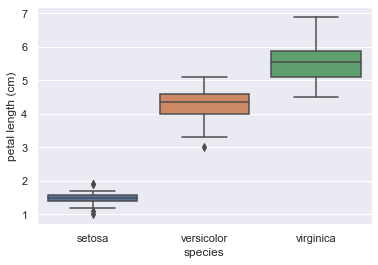

In [15]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')


# Show the plot
plt.show()

### Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.

#### Instructions

- Create an array called differences that is the difference between the petal lengths (versicolor_petal_length) and the mean petal length. The variable versicolor_petal_length is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
- Square each element in this array. For example, x**2 squares each element in the array x. Store the result as diff_sq.
- Compute the mean of the elements in diff_sq using np.mean(). Store the result as variance_explicit.
- Compute the variance of versicolor_petal_length using np.var(). Store the result as variance_np.
- Print both variance_explicit and variance_np in one print call to make sure they are consistent.

In [16]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2


# Compute the mean square difference: variance_explicit
variance_explicit = diff_sq.mean()

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit,variance_np)

0.2611040000000001 0.2611040000000001


bla bla bla

In [17]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.5109833656783752
0.5109833656783752


### Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:
```Python
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')

_ = plt.xlabel('total votes (thousands)')

_ = plt.ylabel('percent of vote for Obama')
```
#### Instructions

- Use plt.plot() with the appropriate keyword arguments to make a scatter plot of versicolor petal length (x-axis) versus petal width (y-axis). The variables versicolor_petal_length and versicolor_petal_width are already in your namespace. Do not forget to use the marker='.' and linestyle='none' keyword arguments.
- Label the axes.
- Display the plot.

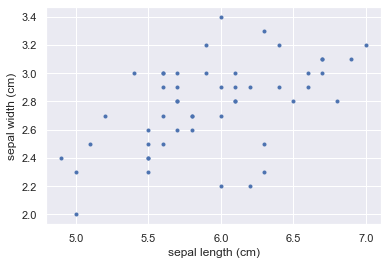

In [18]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('sepal length (cm)')

_ = plt.ylabel('sepal width (cm)')


# Show the result
plt.show()

#### Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

#### Instructions

- Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
- Print the covariance matrix.
- Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
- Print the covariance.

In [19]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.26643265 0.08518367]
 [0.08518367 0.09846939]]
0.08518367346938774


### Computing the Pearson correlation coefficient
As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.

#### Instructions

- Define a function with signature pearson_r(x, y).
- Use np.corrcoef() to compute the correlation matrix of x and y (pass them to np.corrcoef() in that order).
- The function returns entry [0,1] of the correlation matrix.
- Compute the Pearson correlation between the data in the arrays versicolor_petal_length and versicolor_petal_width. Assign the result to r.
- Print the result.

In [20]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

0.5259107172828243


## 3.Thinking probabilistically-- Discrete variables
Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities: those that can only take certain values, like integers.

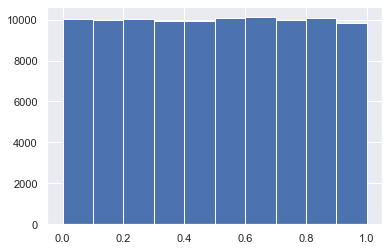

In [21]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


### The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

#### Instructions

- Define a function with signature perform_bernoulli_trials(n, p).
- Initialize to zero a variable n_success the counter of Trues, which are Bernoulli trial successes.
- Write a for loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is True. Perform n iterations by looping over range(n).
- To perform a Bernoulli trial, choose a random number between zero and one using np.random.random(). If the number you chose is less than p, increment n_success (use the += 1 operator to achieve this).
- The function returns the number of successes n_success.

In [22]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success

### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

#### Instructions

- Seed the random number generator to 42.
- Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.
- Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - in this case the probability of a default, which is 0.05. On each iteration of the loop store the result in an entry of n_defaults.
- Plot a histogram of n_defaults. Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.
- Show your plot.

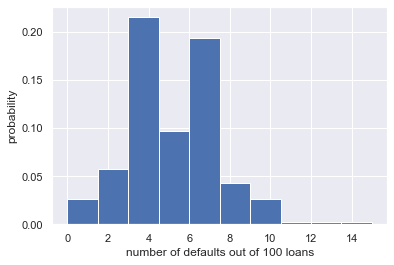

In [23]:
# Seed random number generator
np.random.seed(42)


# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(len(n_defaults)):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

### Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

#### Instructions

- Compute the x and y values for the ECDF of n_defaults.
- Plot the ECDF, making sure to label the axes. Remember to include marker = '.' and linestyle = 'none' in addition to x and y in your call plt.plot().
- Show the plot.
- Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of n_defaults is >= 10. Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.
- The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10. Print this result by hitting 'Submit Answer'!

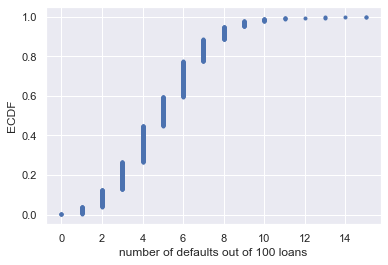

Probability of losing money = 0.022


In [24]:
# Compute ECDF: x, y
x, y =  ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('ECDF')



# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = sum(n_defaults  >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


### Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

#### Instructions

- Draw samples out of the Binomial distribution using np.random.binomial(). You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000.
- Compute the CDF using your previously-written ecdf() function.
- Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.
- Show the plot.

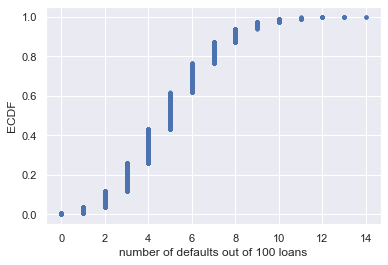

In [25]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100,0.05,size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels

_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('ECDF')


# Show the plot

plt.show()

### Plotting the Binomial PMF
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.

#### Instructions
- Using np.arange(), compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable bins.
- Use plt.hist() to plot the histogram of n_defaults with the normed=True and bins=bins keyword arguments.
- Show the plot.

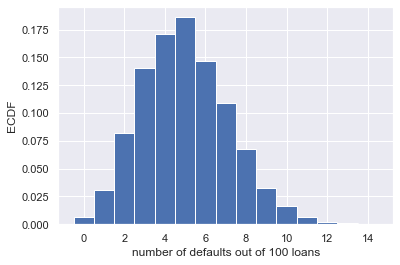

In [26]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults,density=True,bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('ECDF')



# Show the plot
plt.show()

### Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

#### Instructions

- Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10.
-  Make a list of the n and p values to consider for the Binomial distribution. Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that np is always 10.
- Using np.random.binomial() inside the provided for loop, draw 10000 samples from a Binomial distribution with each n, p pair and print the mean and standard deviation of the samples. There are 3 n, p pairs: 20, 0.5, 100, 0.1, and 1000, 0.01. These can be accessed inside the loop as n[i], p[i].

In [27]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

#### Instructions

- Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.
- Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.
- Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000).
- Hit 'Submit Answer' to print the probability that you calculated.

In [28]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters =  np.random.poisson(251/115,10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large = n_large/len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


 ## 4. Thinking probabilistically-- Continuous variables
 It’s time to move onto continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. At the end of this final chapter, you will be speaking the probabilistic language you need to launch into the inference techniques covered in the sequel to this course.
 
###  The Normal PDF
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

#### Instructions

- Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
- Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.
- Hit 'Submit Answer' to make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.

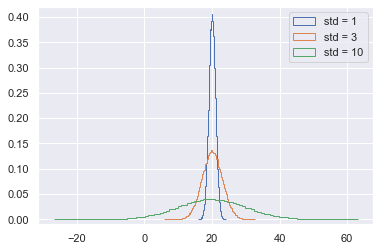

In [38]:

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1, samples_std3, samples_std10 = (np.random.normal(20,1,size=100000), np.random.normal(20,3,size=100000),np.random.normal(20,10,size=100000) )


# Make histograms
_ = plt.hist(samples_std1,density=True,bins=100,histtype='step')
_ = plt.hist(samples_std3,density=True,bins=100,histtype='step')
_ = plt.hist(samples_std10,density=True,bins=100,histtype='step')


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

#### Instructions

- Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.
- Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).
- Hit submit to make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.

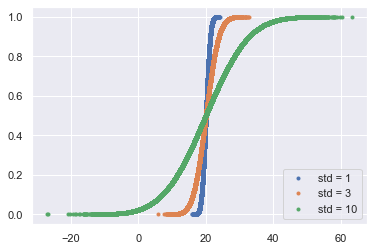

In [48]:
# Generate CDFs
(x_std1, y_std1),(x_std3, y_std3),(x_std10, y_std10 ) = (ecdf(samples_std1), ecdf(samples_std3), ecdf(samples_std10))

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
_ = _ = plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')

_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

#### Instructions

- Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array belmont_no_outliers has these data.
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().
- Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

In [52]:
## Data for ex
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54, 149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97, 146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147., 147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 , 149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 , 149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 , 150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  , 148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 , 149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 , 149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 , 152.2 ])

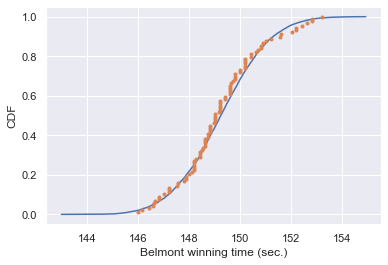

In [51]:
# Compute mean and standard deviation: mu, sigma
mu, sigma = (np.mean(belmont_no_outliers),np.std(belmont_no_outliers))


# Sample out of a normal distribution with this mu and sigma: samples

samples = np.random.normal(mu, sigma,size=10000)


# Get the CDF of the samples and of the data
(x_theor, y_theor),(x, y) = (ecdf(samples), ecdf(belmont_no_outliers))


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

#### Instructions

- Take 1,000,000 samples from the normal distribution using the np.random.normal() function. The mean mu and standard deviation sigma are already loaded into the namespace of your IPython instance.
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.

In [53]:
(mu,sigma) =  (149.22101123595507, 1.627816471774816)

In [56]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma,size=1000000)

# Compute the fraction that are faster than 144 seconds: prob

prob = np.sum(samples < 144)/len(samples)


# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000678


### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

#### Instructions

- Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.
- Draw waiting times tau1 (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.
- Draw waiting times tau2 (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.
- The function returns the sum of the waiting times for the two events.

In [58]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size = size)

    # Draw samples out of second exponential distribution: t2
    t2  = np.random.exponential(tau2, size = size)

    return t1 + t2

### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

#### Instructions

- Use your successive_poisson() function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.
- Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use bins=100, normed=True, and histtype='step'.
- Label the axes.
- Show your plot.

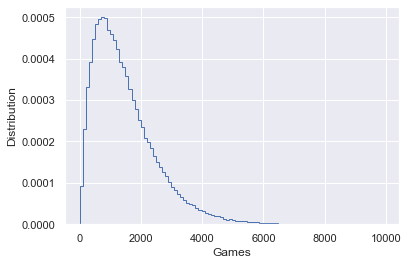

In [60]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764 , 715, size = 100000 )

# Make the histogram

_ = plt.hist(waiting_times, bins=100, histtype='step', density=True)

# Label axes

_ = plt.xlabel('Games')
_ = plt.ylabel('Distribution')

# Show the plot
plt.show()